<a href="https://colab.research.google.com/github/Thien24112001/BaiTapAI_Tuan15_19146395/blob/main/Detect_face_CNN_VoHoangThien_19146395.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import  pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import np_utils
from keras.preprocessing.image import load_img, img_to_array,ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from keras.models import load_model
from array import array
from random import randint

In [ ]:
train_dataset = ImageDataGenerator(rescale=1/255,zoom_range=[0.7,1.3],width_shift_range=[-25,25],height_shift_range=[-25,25],brightness_range=[0.2,2.0],rotation_range=35,shear_range=20).flow_from_directory("/content/drive/MyDrive/Hitori/train",target_size=(150,150),batch_size = 5,class_mode = "binary")
test_dataset = ImageDataGenerator(rescale=1/255,zoom_range=[0.7,1.3],width_shift_range=[-25,25],height_shift_range=[-25,25],brightness_range=[0.2,2.0],rotation_range=35,shear_range=20).flow_from_directory("/content/drive/MyDrive/Hitori/test/",target_size=(150,150),batch_size = 5,class_mode = "binary")

Found 233 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'not_thien': 0, 'thien': 1}

In [ ]:
model = Sequential()
#Lock1
model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPool2D((2,2)))
#Lock2
model.add(Conv2D(64,(3,3),activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPool2D((2,2)))
#lock3
model.add(Conv2D(128,(3,3),activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (150,150,3)))
model.add(Conv2D(128,(3,3),activation='relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs = 10,validation_data=test_dataset)

Epoch 1/10
47/47 [==============================] - 5s 97ms/step - loss: 3.5570 - accuracy: 0.6395 - val_loss: 0.8103 - val_accuracy: 0.5250
Epoch 2/10
47/47 [==============================] - 4s 90ms/step - loss: 0.7194 - accuracy: 0.5966 - val_loss: 0.4276 - val_accuracy: 0.8000
Epoch 3/10
47/47 [==============================] - 4s 89ms/step - loss: 1.4903 - accuracy: 0.7039 - val_loss: 0.5081 - val_accuracy: 0.7000
Epoch 4/10
47/47 [==============================] - 4s 89ms/step - loss: 0.2940 - accuracy: 0.8455 - val_loss: 0.3016 - val_accuracy: 0.8500
Epoch 5/10
47/47 [==============================] - 4s 89ms/step - loss: 0.2353 - accuracy: 0.8584 - val_loss: 0.5927 - val_accuracy: 0.8750
Epoch 6/10
47/47 [==============================] - 4s 89ms/step - loss: 0.2157 - accuracy: 0.8584 - val_loss: 0.3111 - val_accuracy: 0.9000
Epoch 7/10
47/47 [==============================] - 4s 87ms/step - loss: 0.1383 - accuracy: 0.9313 - val_loss: 0.2618 - val_accuracy: 0.8250
Epoch 8/10
47

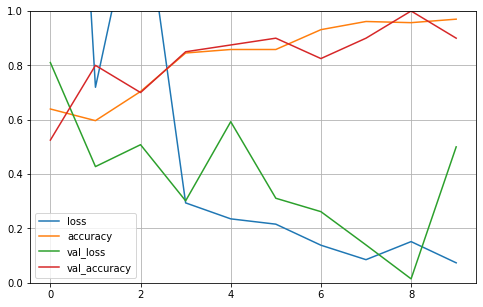

In [ ]:
#Ve do thi
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.save('Detect_face_CNN.h5')